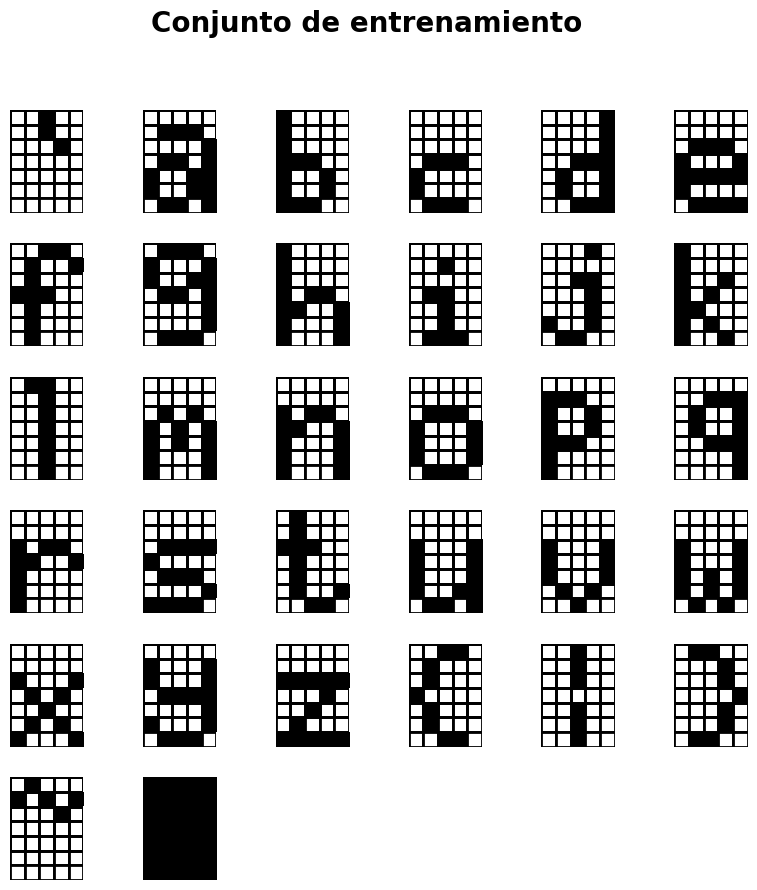

2
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
Finished Training. 
 MSE: 0.6876883155810186


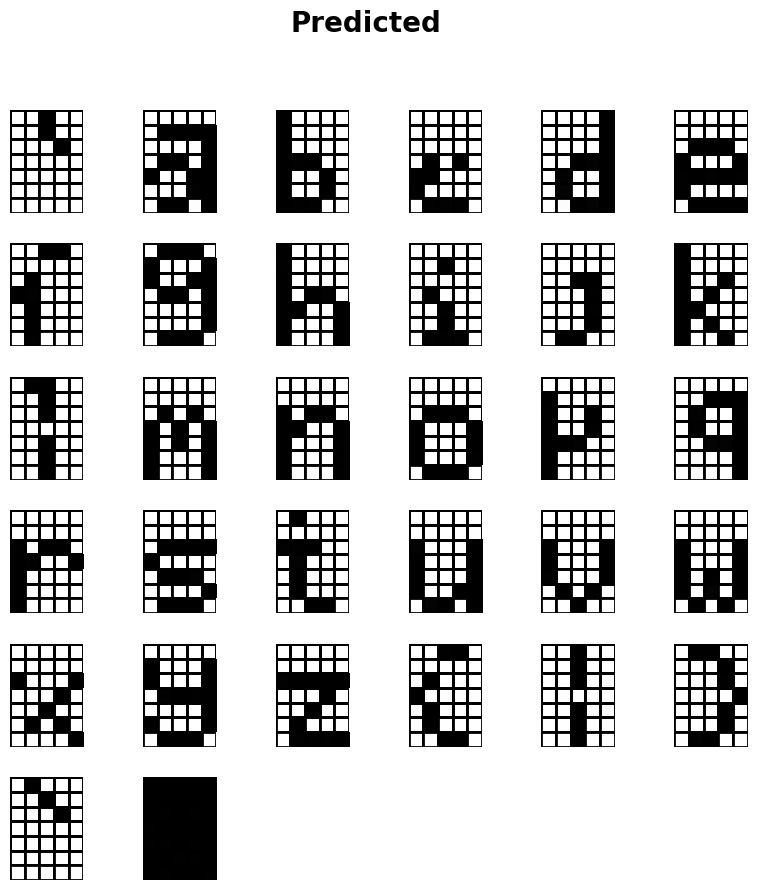

Latent space value:  [0.20770198 0.99833852]  for letter in index  0
Latent space value:  [0.00109916 0.1774396 ]  for letter in index  1
Latent space value:  [0.81663756 0.01736434]  for letter in index  2
Latent space value:  [0.91784685 0.5875342 ]  for letter in index  3
Latent space value:  [0.05510596 0.22928053]  for letter in index  4
Latent space value:  [0.51583841 0.47637447]  for letter in index  5
Latent space value:  [0.98987639 0.92670838]  for letter in index  6
Latent space value:  [0.03746854 0.08877338]  for letter in index  7
Latent space value:  [0.56549213 0.00123399]  for letter in index  8
Latent space value:  [0.1030985  0.99669467]  for letter in index  9
Latent space value:  [0.09646149 0.7559989 ]  for letter in index  10
Latent space value:  [0.98250581 0.13189101]  for letter in index  11
Latent space value:  [0.00898718 0.98607671]  for letter in index  12
Latent space value:  [0.37650726 0.06718833]  for letter in index  13
Latent space value:  [0.547585

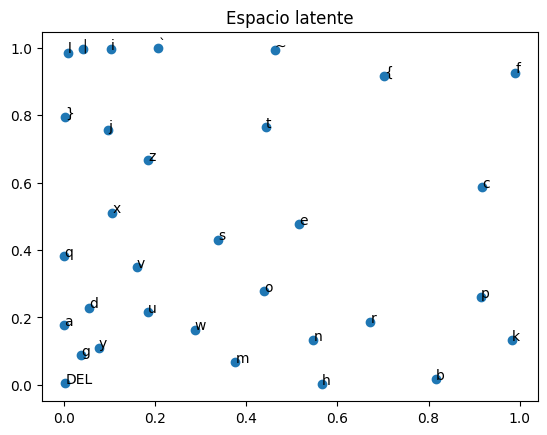

----------------Mutacion=0.1----------------


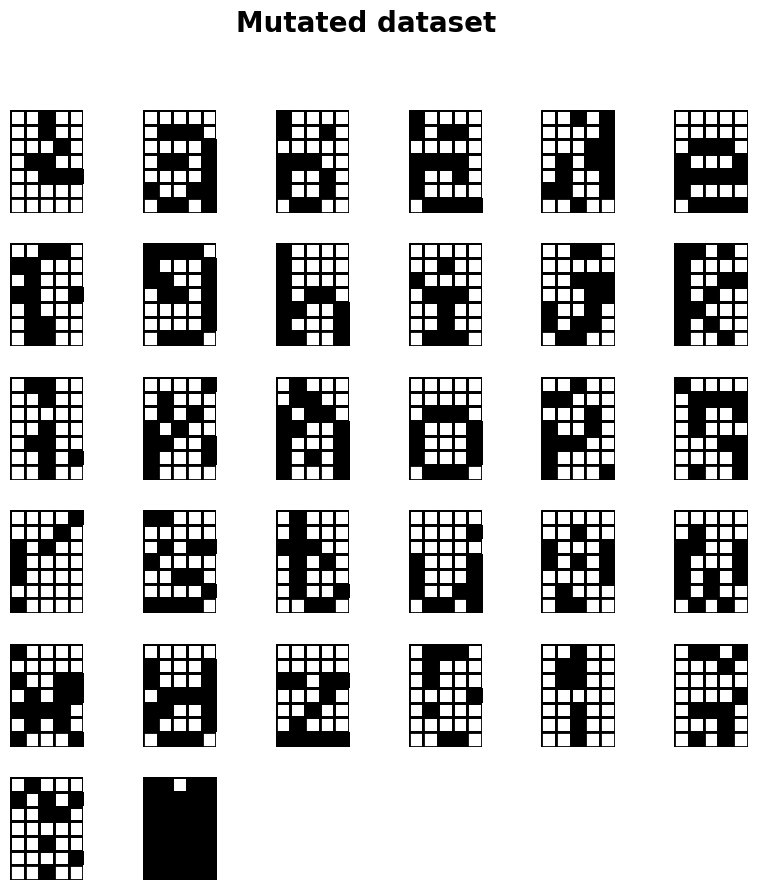

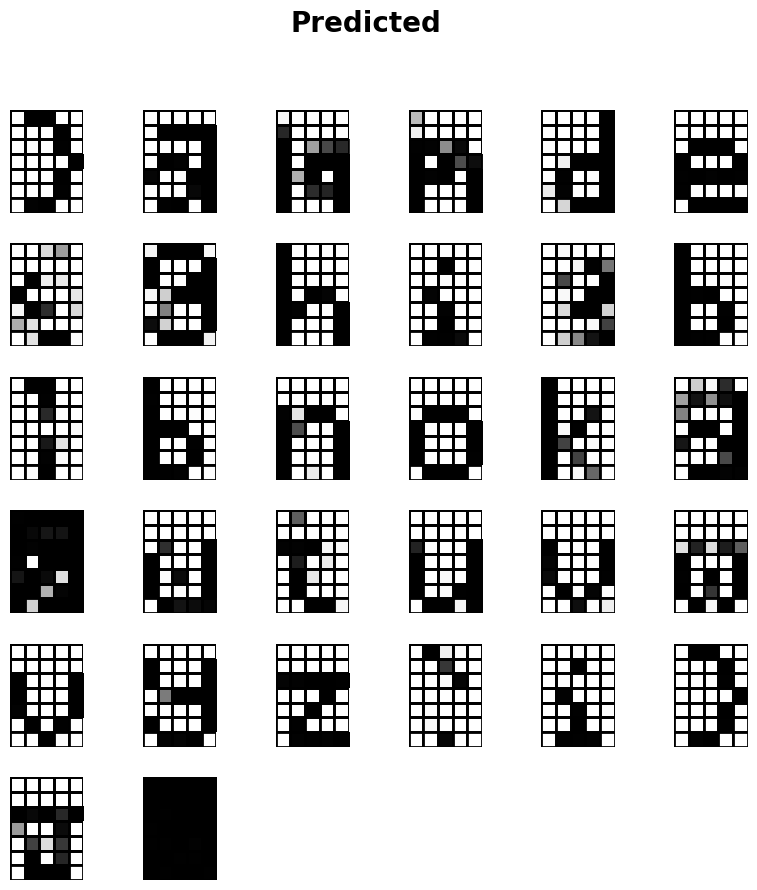

Latent space value:  [0.00625319 0.79280838]  for letter in index  0
Latent space value:  [0.00109269 0.1986282 ]  for letter in index  1
Latent space value:  [0.26942786 0.00229959]  for letter in index  2
Latent space value:  [0.44178632 0.00159342]  for letter in index  3
Latent space value:  [0.06720956 0.21950818]  for letter in index  4
Latent space value:  [0.51583841 0.47637447]  for letter in index  5
Latent space value:  [0.74010289 0.80068339]  for letter in index  6
Latent space value:  [0.05142137 0.03920077]  for letter in index  7
Latent space value:  [0.58906451 0.00129825]  for letter in index  8
Latent space value:  [0.08867554 0.94280246]  for letter in index  9
Latent space value:  [0.04638259 0.59360181]  for letter in index  10
Latent space value:  [0.88803704 0.02023135]  for letter in index  11
Latent space value:  [0.00524575 0.94180073]  for letter in index  12
Latent space value:  [0.77689853 0.02576853]  for letter in index  13
Latent space value:  [0.513454

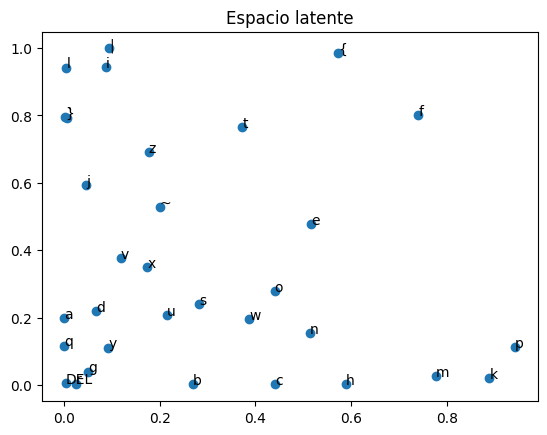

----------------Mutacion=0.2----------------


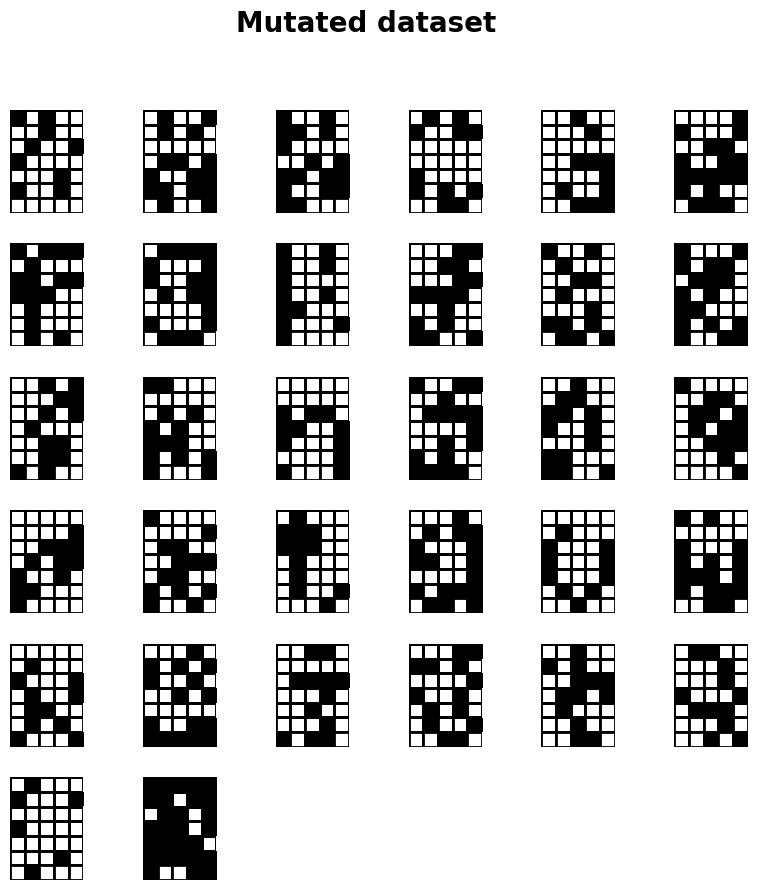

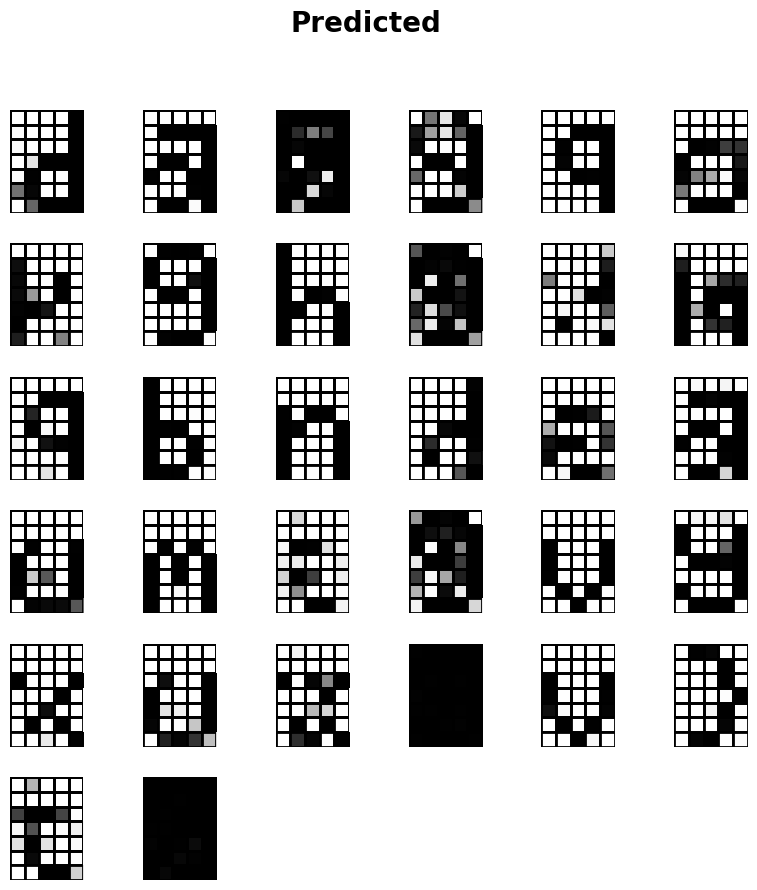

Latent space value:  [0.10538046 0.1910807 ]  for letter in index  0
Latent space value:  [0.00112143 0.16837194]  for letter in index  1
Latent space value:  [0.04476227 0.00335258]  for letter in index  2
Latent space value:  [0.00233221 0.1042726 ]  for letter in index  3
Latent space value:  [0.00172459 0.45612096]  for letter in index  4
Latent space value:  [0.31405492 0.33713842]  for letter in index  5
Latent space value:  [0.92508616 0.43319239]  for letter in index  6
Latent space value:  [0.03577971 0.10329397]  for letter in index  7
Latent space value:  [0.57616821 0.00118983]  for letter in index  8
Latent space value:  [0.00141875 0.04712146]  for letter in index  9
Latent space value:  [0.0818567  0.44110568]  for letter in index  10
Latent space value:  [0.24953672 0.0024385 ]  for letter in index  11
Latent space value:  [0.00191906 0.2855406 ]  for letter in index  12
Latent space value:  [0.82669583 0.01554579]  for letter in index  13
Latent space value:  [0.537171

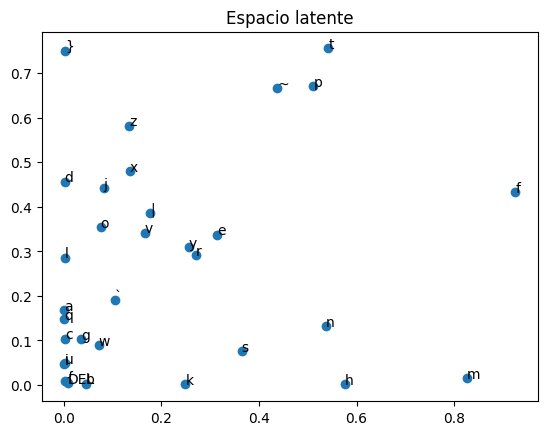

----------------Mutacion=0.3----------------


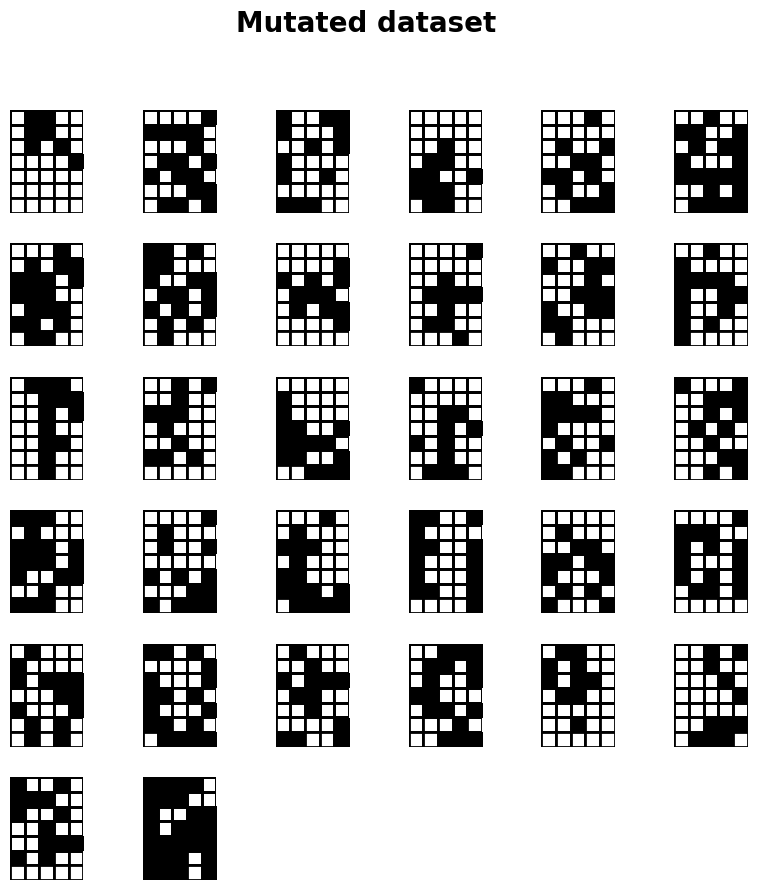

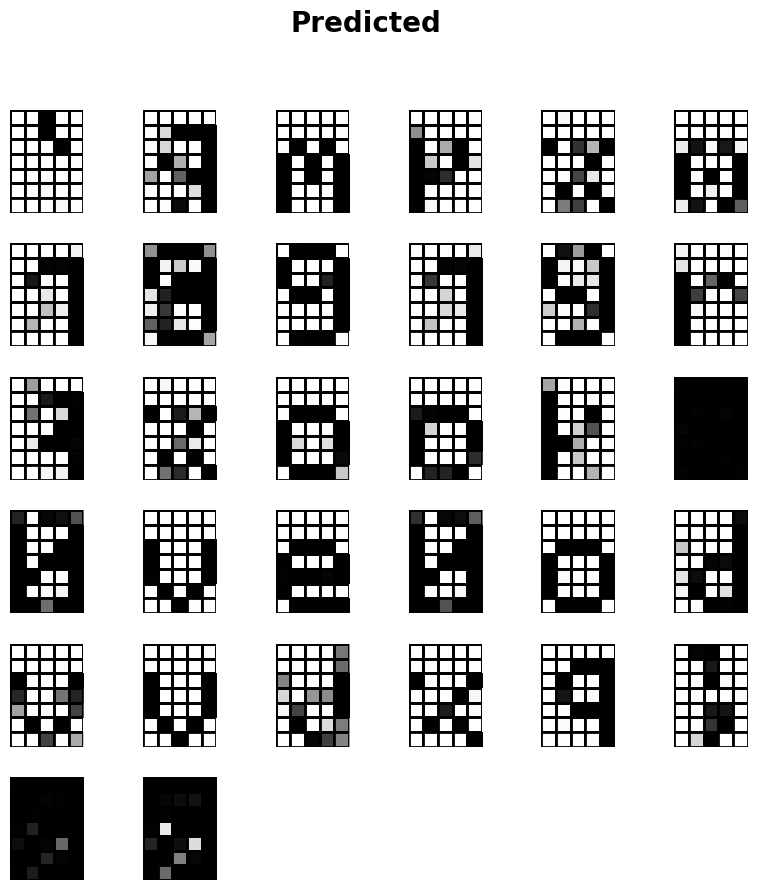

Latent space value:  [0.17954555 0.99497554]  for letter in index  0
Latent space value:  [0.00121851 0.24735266]  for letter in index  1
Latent space value:  [0.40820998 0.04461267]  for letter in index  2
Latent space value:  [0.73963387 0.31198647]  for letter in index  3
Latent space value:  [0.0964726  0.60297572]  for letter in index  4
Latent space value:  [0.40617975 0.15370789]  for letter in index  5
Latent space value:  [0.02359608 0.33582708]  for letter in index  6
Latent space value:  [0.0174238  0.03791141]  for letter in index  7
Latent space value:  [0.03024788 0.10724814]  for letter in index  8
Latent space value:  [0.020619   0.30270074]  for letter in index  9
Latent space value:  [0.00186428 0.07197921]  for letter in index  10
Latent space value:  [0.8197036  0.15250742]  for letter in index  11
Latent space value:  [0.00208062 0.57185473]  for letter in index  12
Latent space value:  [0.11859728 0.57960901]  for letter in index  13
Latent space value:  [0.441071

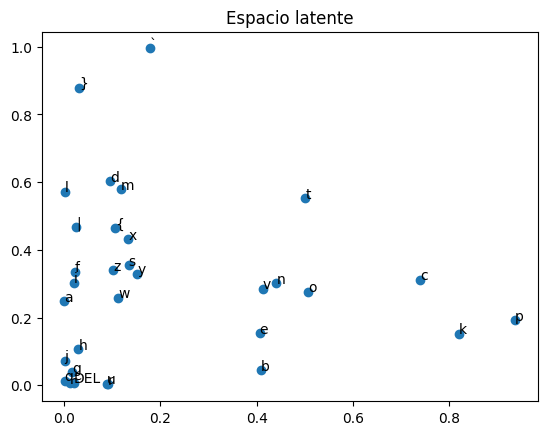

----------------Mutacion=0.4----------------


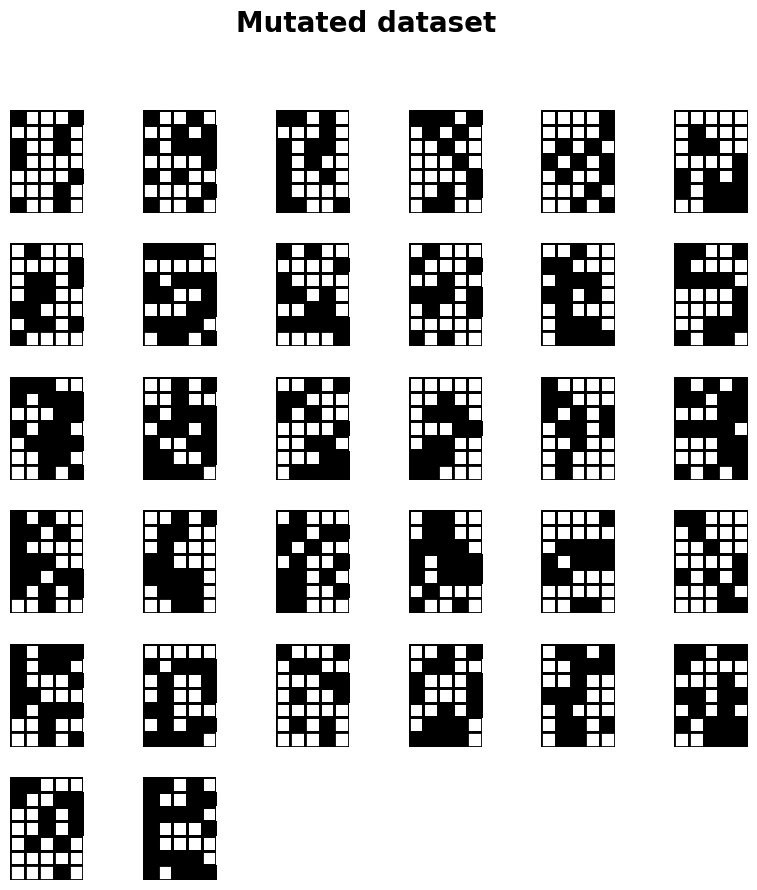

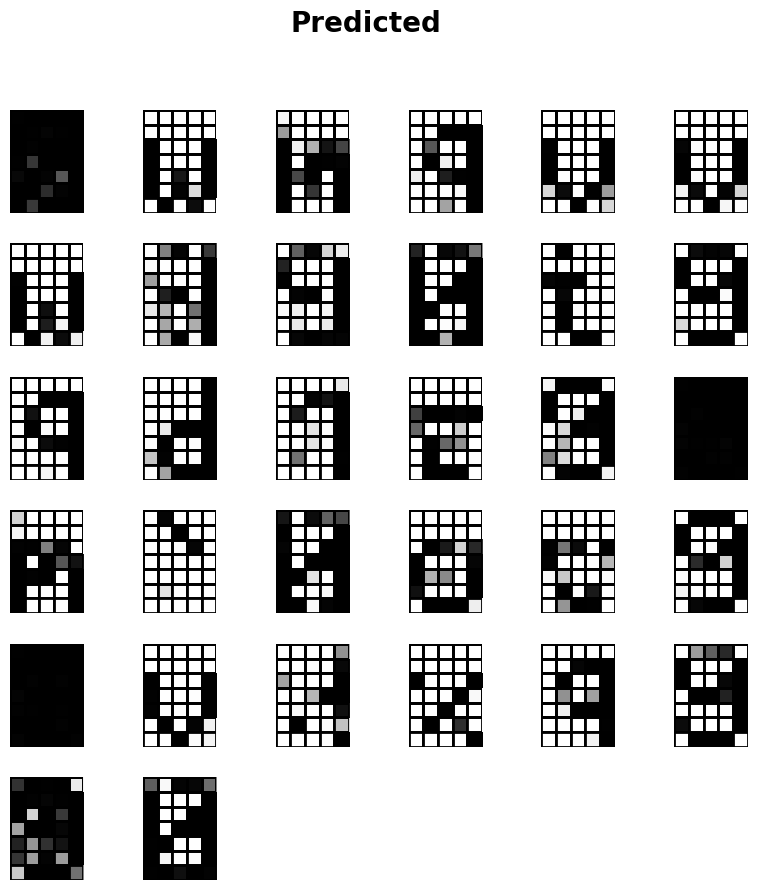

Latent space value:  [0.01300567 0.00350549]  for letter in index  0
Latent space value:  [0.2513129  0.15987386]  for letter in index  1
Latent space value:  [0.33889904 0.00162404]  for letter in index  2
Latent space value:  [0.00172666 0.27199219]  for letter in index  3
Latent space value:  [0.19464554 0.28957868]  for letter in index  4
Latent space value:  [0.22146883 0.32885391]  for letter in index  5
Latent space value:  [0.27097895 0.1932037 ]  for letter in index  6
Latent space value:  [0.02870229 0.17000128]  for letter in index  7
Latent space value:  [0.04248697 0.13724319]  for letter in index  8
Latent space value:  [0.10653129 0.0055058 ]  for letter in index  9
Latent space value:  [0.46693905 0.74933467]  for letter in index  10
Latent space value:  [0.04954917 0.08863445]  for letter in index  11
Latent space value:  [0.00150154 0.29746303]  for letter in index  12
Latent space value:  [0.09443755 0.21513268]  for letter in index  13
Latent space value:  [0.031099

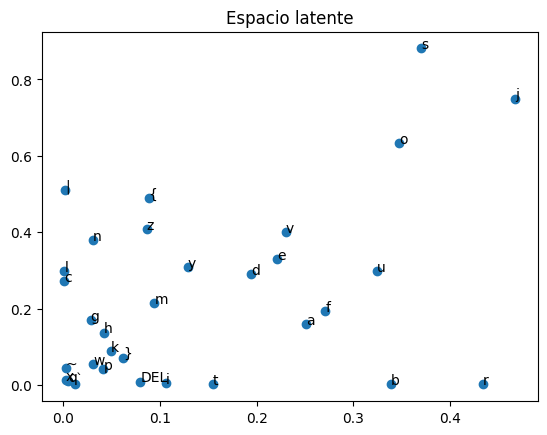

----------------Mutacion=0.5----------------


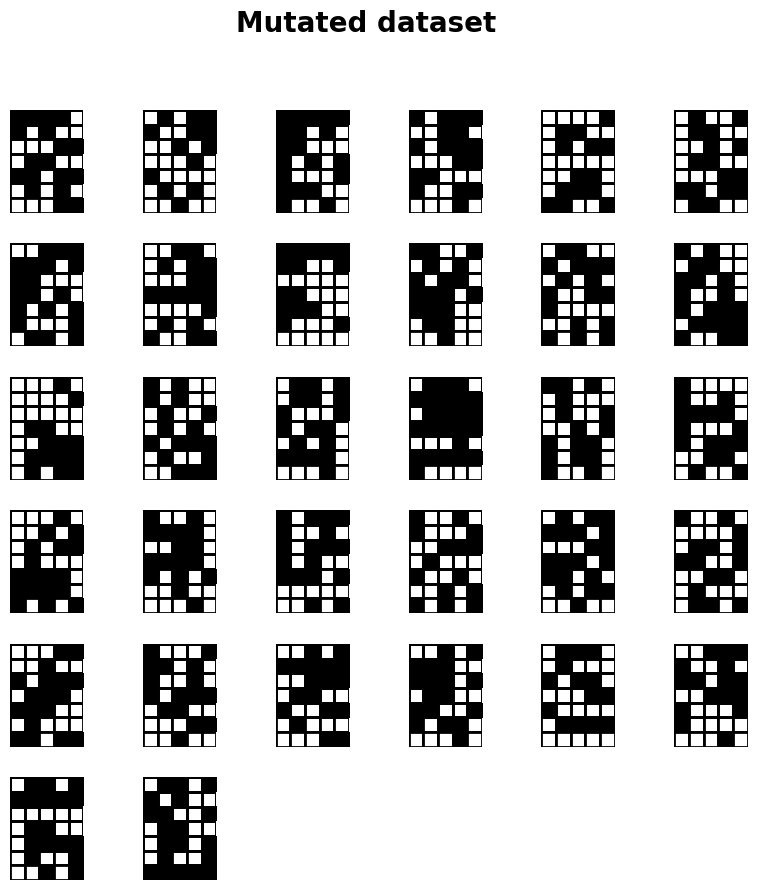

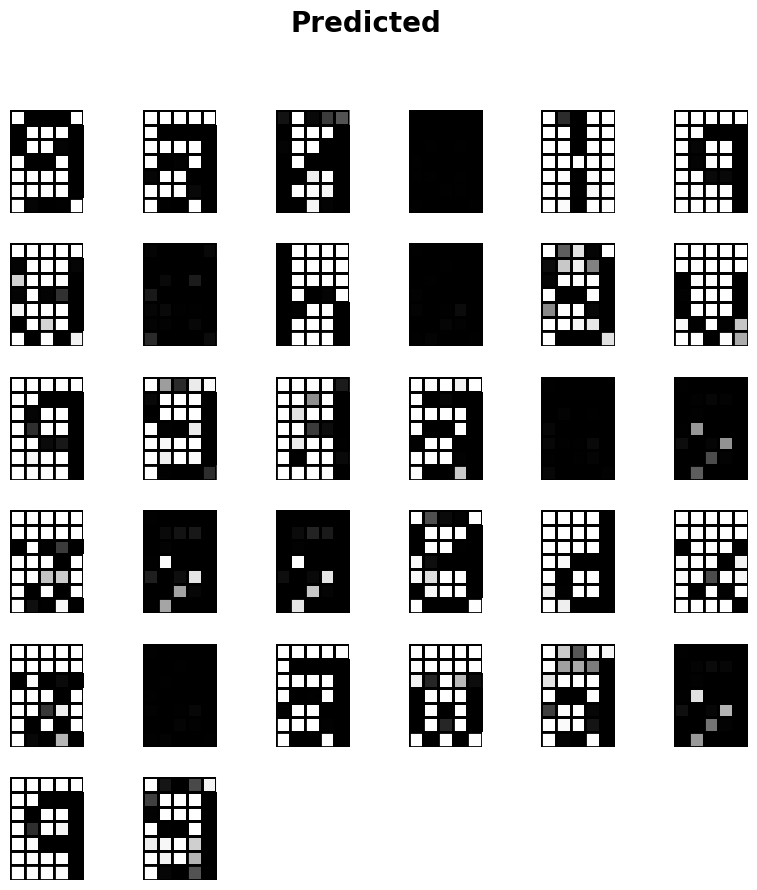

Latent space value:  [0.0293107  0.09254912]  for letter in index  0
Latent space value:  [0.00172239 0.19783115]  for letter in index  1
Latent space value:  [0.14461696 0.00198744]  for letter in index  2
Latent space value:  [0.00336569 0.00592751]  for letter in index  3
Latent space value:  [0.04292922 0.91811162]  for letter in index  4
Latent space value:  [0.00815992 0.3322378 ]  for letter in index  5
Latent space value:  [0.15530198 0.08079124]  for letter in index  6
Latent space value:  [0.00172667 0.03392307]  for letter in index  7
Latent space value:  [0.58935683 0.00139799]  for letter in index  8
Latent space value:  [0.00760876 0.0059781 ]  for letter in index  9
Latent space value:  [0.00199661 0.09873663]  for letter in index  10
Latent space value:  [0.14185835 0.28009946]  for letter in index  11
Latent space value:  [0.02695307 0.42732423]  for letter in index  12
Latent space value:  [0.04794611 0.13209712]  for letter in index  13
Latent space value:  [0.045821

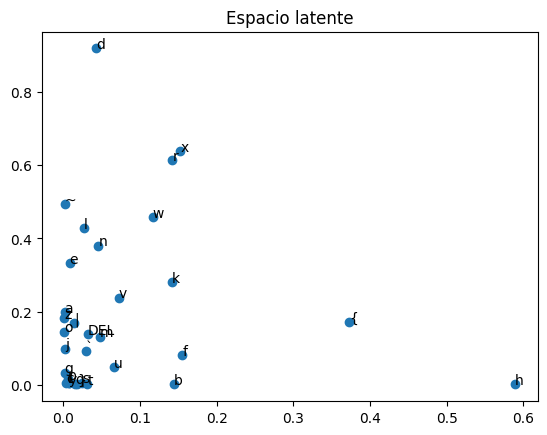

In [1]:
import json
import copy
from src.utils import DataConfig, alter_data
from src.autoencoder import Autoencoder
from src.plots import *
from data.font import _font_3, symbols3    

def main(): 
    with open('./config_denoising.json', 'r') as f:
        data_config = json.load(f)

    c = DataConfig(data_config, _font_3)
    plot_letters(c.input_data, "Conjunto de entrenamiento")

    autoencoder = Autoencoder(c.input_data, len(c.input_data[0]), c.latent_space_size,
                            c.learning_rate, c.bias, c.epochs, c.training_percentage,
                            c.min_error, c.qty_hidden_layers, c.qty_nodes_in_hidden_layers, 
                            c.output_activation, c.hidden_activation, c.beta,
                            c.optimizer_method, c.alpha, c.beta1, c.beta2,
                            c.epsilon)
    autoencoder.train()

    # Análisis de dataset original
    predicted = []
    for x in c.input_data:
        p = autoencoder.predict(x)
        predicted.append(p)
    plot_letters(predicted, "Predicted")
    
    list = []
    for i in range(len(c.input_data)):
        value = autoencoder.latent_space(c.input_data[i])
        list.append(value)
        print("Latent space value: ", value, " for letter in index ", i)
    plot_latent_space(np.array(list), symbols3)


    # Análisis de dataset mutado
    for i in [round(0.1*i,2) for i in range(1,6)]:
        print(f"----------------Mutacion={i}----------------")
        original_input = copy.deepcopy(c.input_data)
        alter_data(original_input, i)
        plot_letters(original_input, "Mutated dataset")

        predicted = []
        for x in original_input:
            p = autoencoder.predict(x)
            predicted.append(p)
        plot_letters(predicted, "Predicted")
        
        list = []
        for i in range(len(original_input)):
            value = autoencoder.latent_space(original_input[i])
            list.append(value)
            print("Latent space value: ", value, " for letter in index ", i)
        plot_latent_space(np.array(list), symbols3)
    


if __name__ == "__main__":
    main()

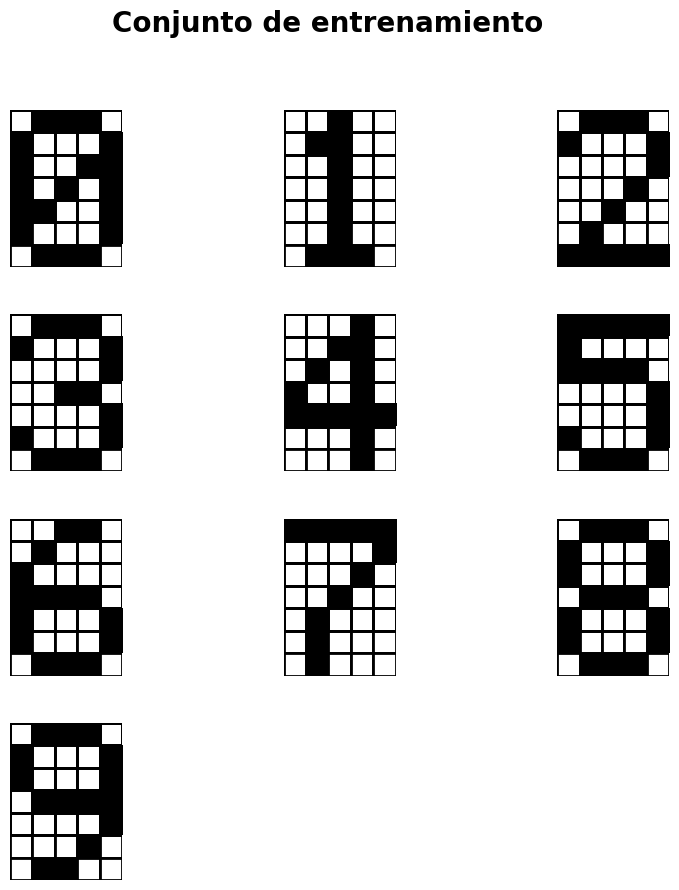

2
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
Finished Training. 
 MSE: 0.10000002213163035


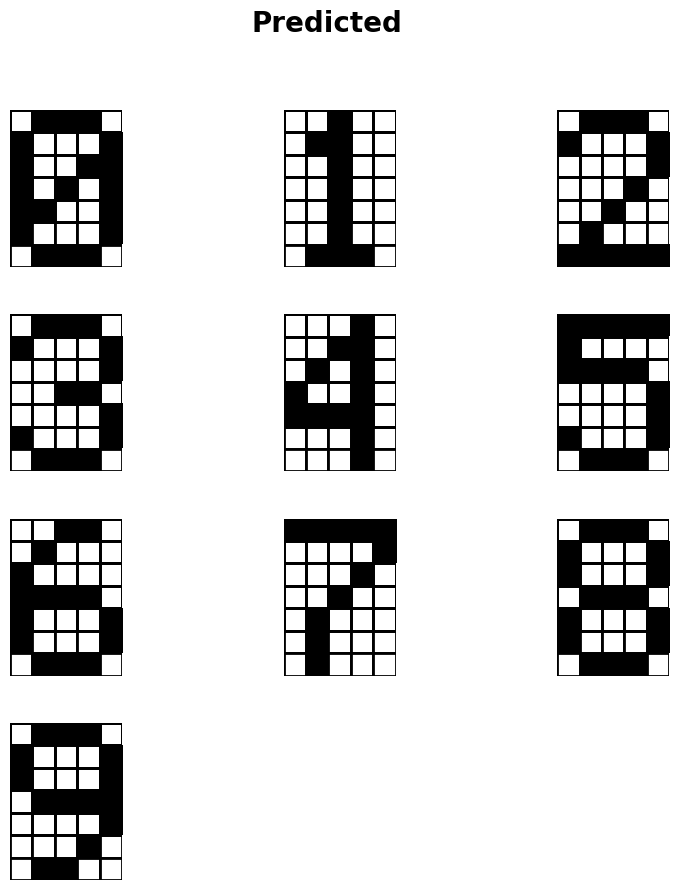

Latent space value:  [0.00054142 0.33661355]  for letter in index  0
Latent space value:  [0.99890185 0.85980205]  for letter in index  1
Latent space value:  [0.99969899 0.47056528]  for letter in index  2
Latent space value:  [0.72201664 0.99625318]  for letter in index  3
Latent space value:  [0.99576726 0.00236067]  for letter in index  4
Latent space value:  [0.00267218 0.03026453]  for letter in index  5
Latent space value:  [6.18713020e-04 8.29045519e-01]  for letter in index  6
Latent space value:  [0.40885904 0.00104162]  for letter in index  7
Latent space value:  [0.17552496 0.99874153]  for letter in index  8
Latent space value:  [0.37943838 0.99873671]  for letter in index  9


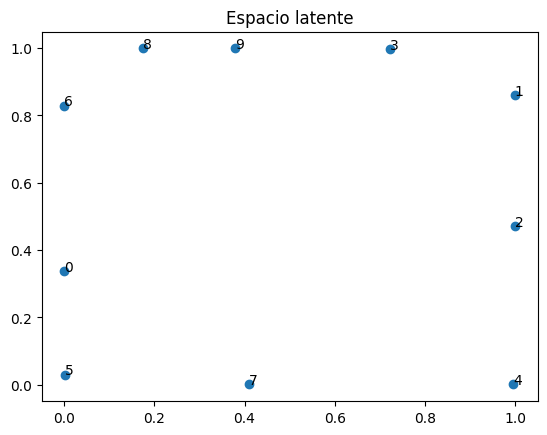

----------------Mutacion=0.1----------------


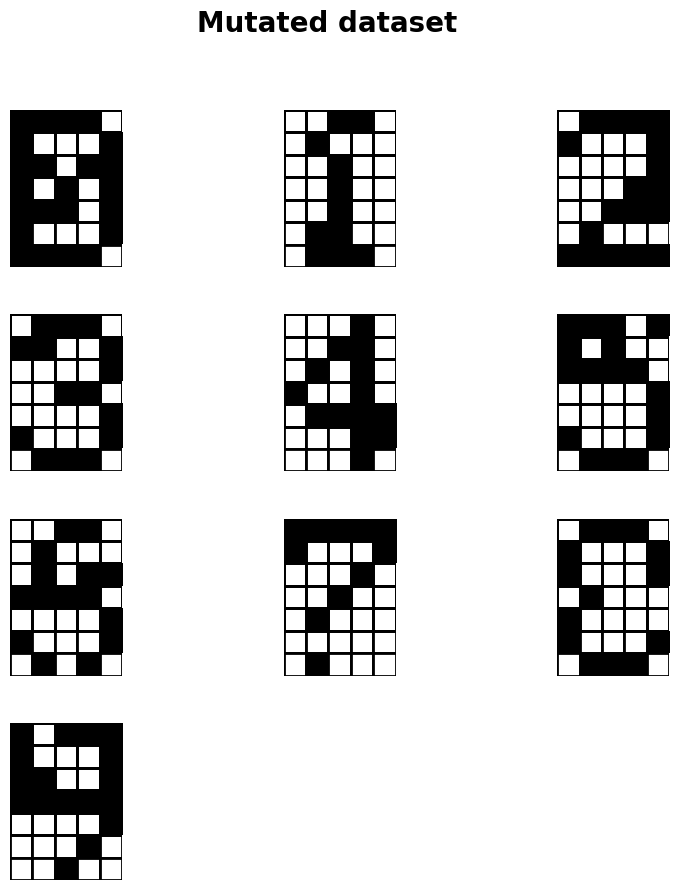

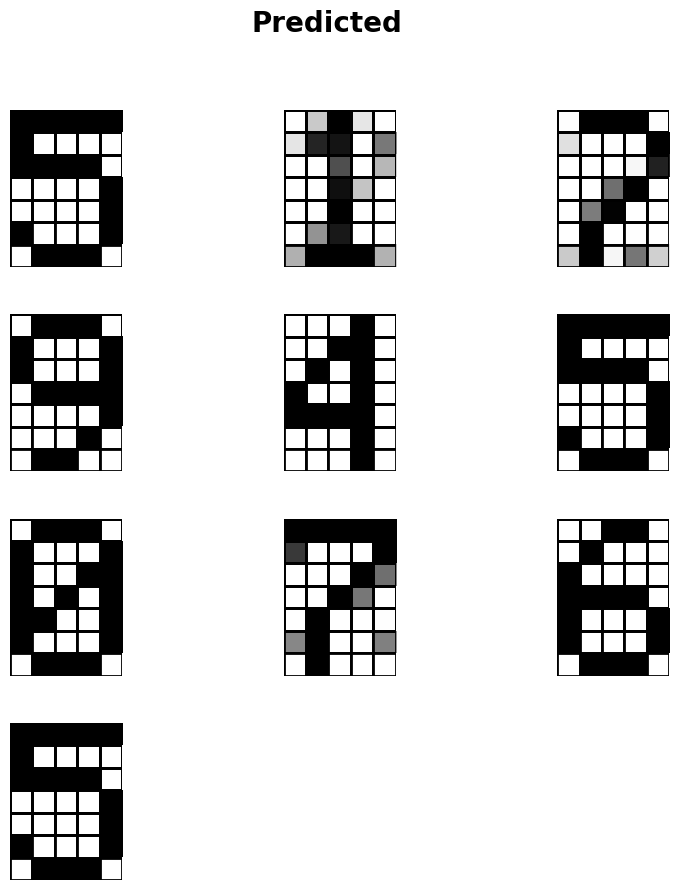

Latent space value:  [0.00739746 0.01478122]  for letter in index  0
Latent space value:  [0.99922304 0.64390842]  for letter in index  1
Latent space value:  [0.99969519 0.28423355]  for letter in index  2
Latent space value:  [0.48010755 0.99825026]  for letter in index  3
Latent space value:  [0.99658867 0.00304432]  for letter in index  4
Latent space value:  [0.00283091 0.0301764 ]  for letter in index  5
Latent space value:  [0.00070267 0.36049205]  for letter in index  6
Latent space value:  [0.28205364 0.00172628]  for letter in index  7
Latent space value:  [0.00700882 0.98933037]  for letter in index  8
Latent space value:  [0.00257489 0.03712957]  for letter in index  9


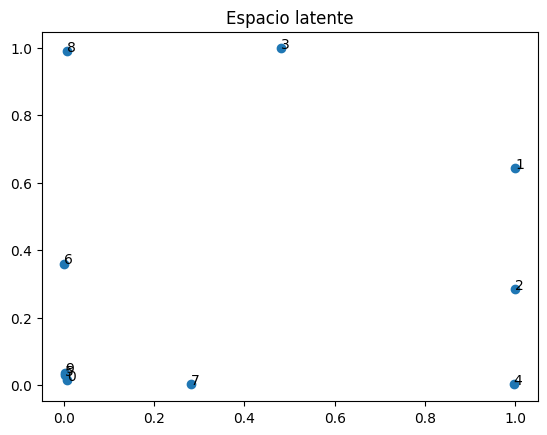

----------------Mutacion=0.2----------------


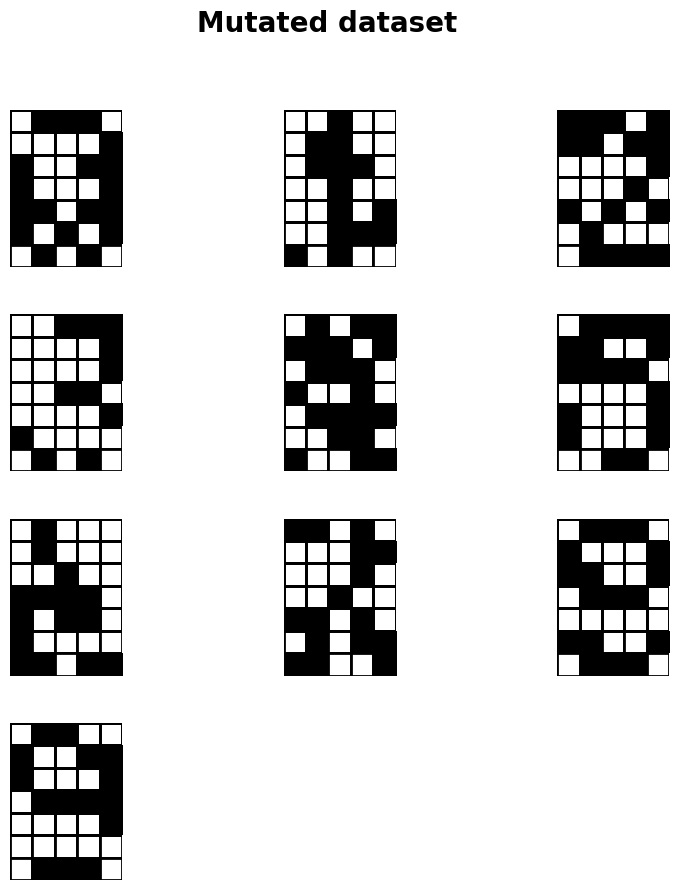

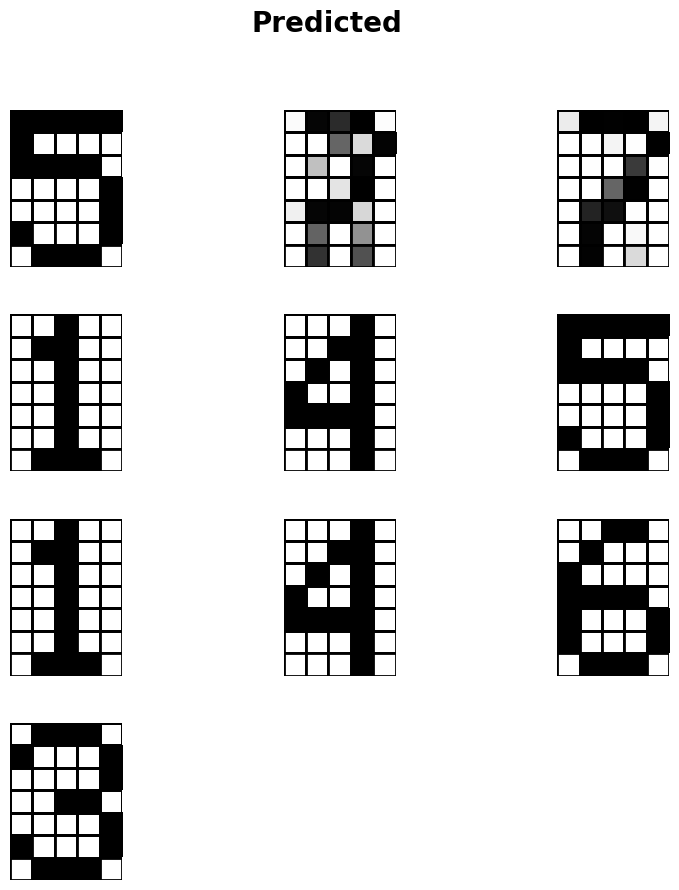

Latent space value:  [0.02741929 0.03287065]  for letter in index  0
Latent space value:  [0.99907762 0.1672524 ]  for letter in index  1
Latent space value:  [0.99961699 0.20648085]  for letter in index  2
Latent space value:  [0.95601289 0.78854659]  for letter in index  3
Latent space value:  [0.99893913 0.02362206]  for letter in index  4
Latent space value:  [0.00117903 0.07655733]  for letter in index  5
Latent space value:  [0.99848446 0.82320273]  for letter in index  6
Latent space value:  [0.99828394 0.00834695]  for letter in index  7
Latent space value:  [0.00216926 0.76300855]  for letter in index  8
Latent space value:  [0.59919189 0.99852111]  for letter in index  9


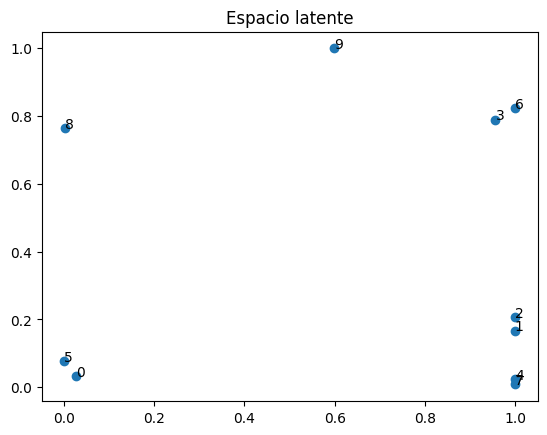

----------------Mutacion=0.3----------------


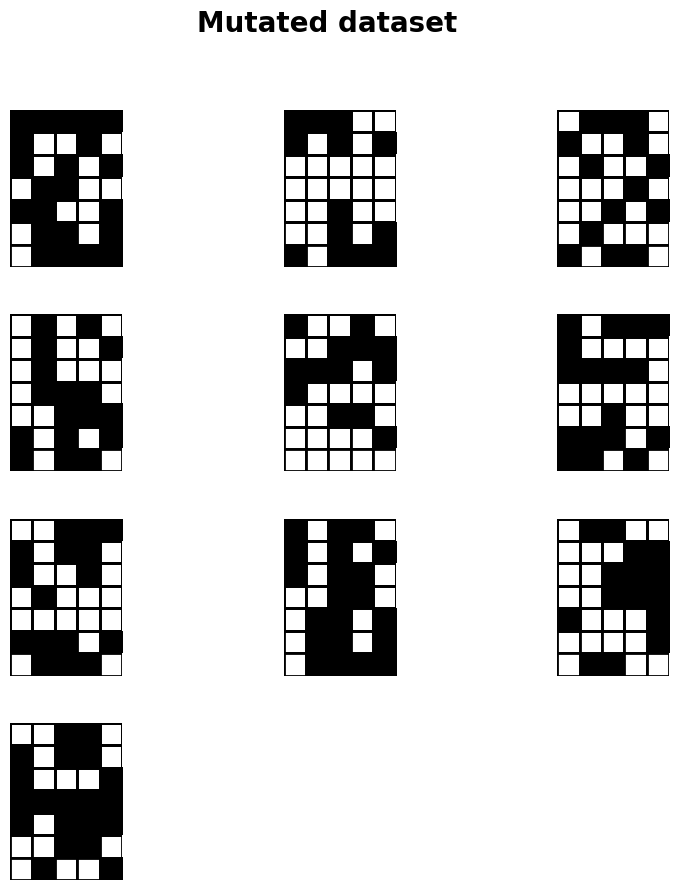

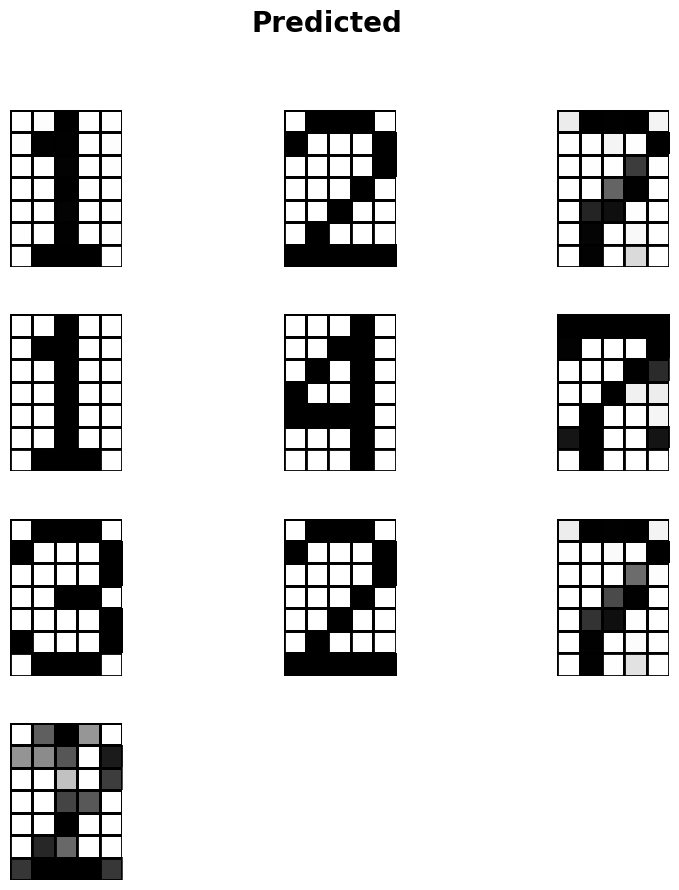

Latent space value:  [0.93227736 0.98080808]  for letter in index  0
Latent space value:  [0.99965201 0.53034742]  for letter in index  1
Latent space value:  [0.99959687 0.20711785]  for letter in index  2
Latent space value:  [0.98929376 0.89551481]  for letter in index  3
Latent space value:  [0.99546026 0.00371479]  for letter in index  4
Latent space value:  [0.22928938 0.00300174]  for letter in index  5
Latent space value:  [0.73290903 0.99688736]  for letter in index  6
Latent space value:  [0.99946207 0.44087147]  for letter in index  7
Latent space value:  [0.99644827 0.22155062]  for letter in index  8
Latent space value:  [0.99911091 0.62974365]  for letter in index  9


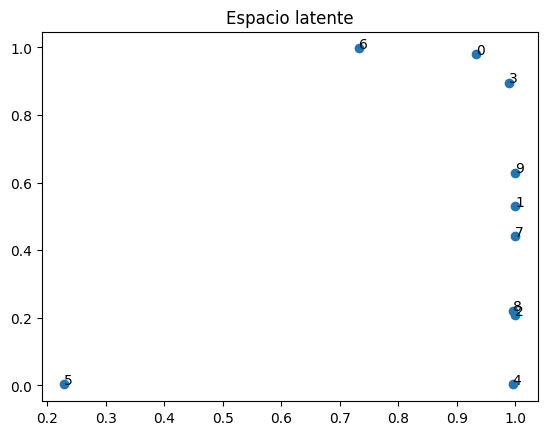

----------------Mutacion=0.4----------------


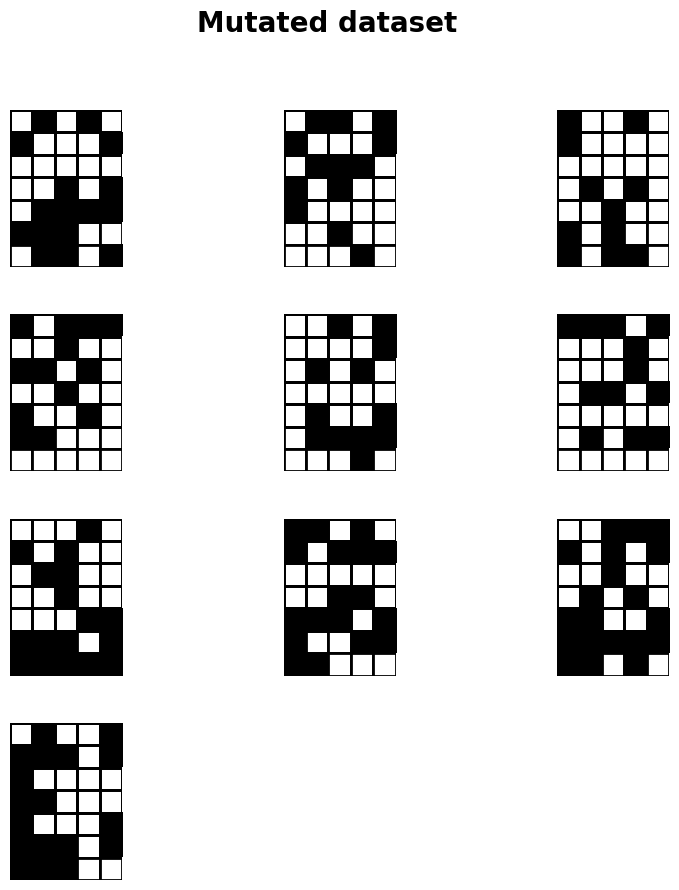

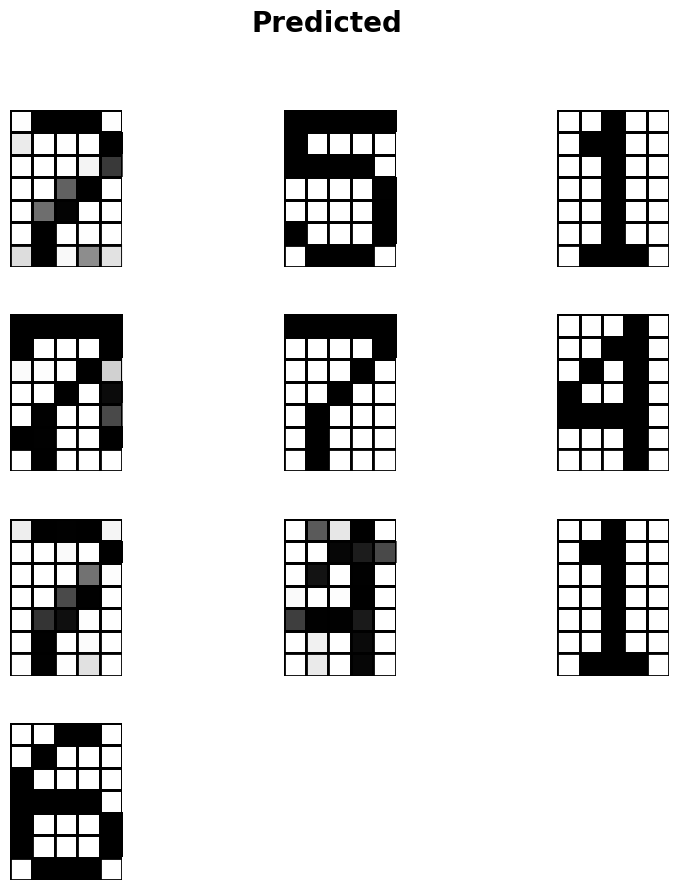

Latent space value:  [0.99950466 0.27843846]  for letter in index  0
Latent space value:  [0.04773873 0.00433872]  for letter in index  1
Latent space value:  [0.96952357 0.98818384]  for letter in index  2
Latent space value:  [0.16599653 0.0020391 ]  for letter in index  3
Latent space value:  [0.41438715 0.00113274]  for letter in index  4
Latent space value:  [0.83629182 0.01100104]  for letter in index  5
Latent space value:  [0.9995084 0.2240317]  for letter in index  6
Latent space value:  [0.9995886  0.14268707]  for letter in index  7
Latent space value:  [0.99725705 0.90315321]  for letter in index  8
Latent space value:  [0.00600544 0.98320171]  for letter in index  9


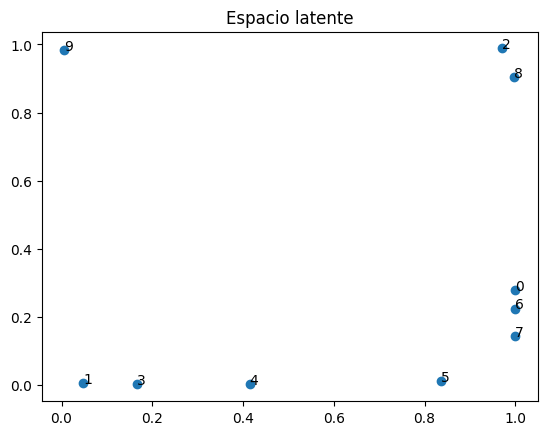

----------------Mutacion=0.5----------------


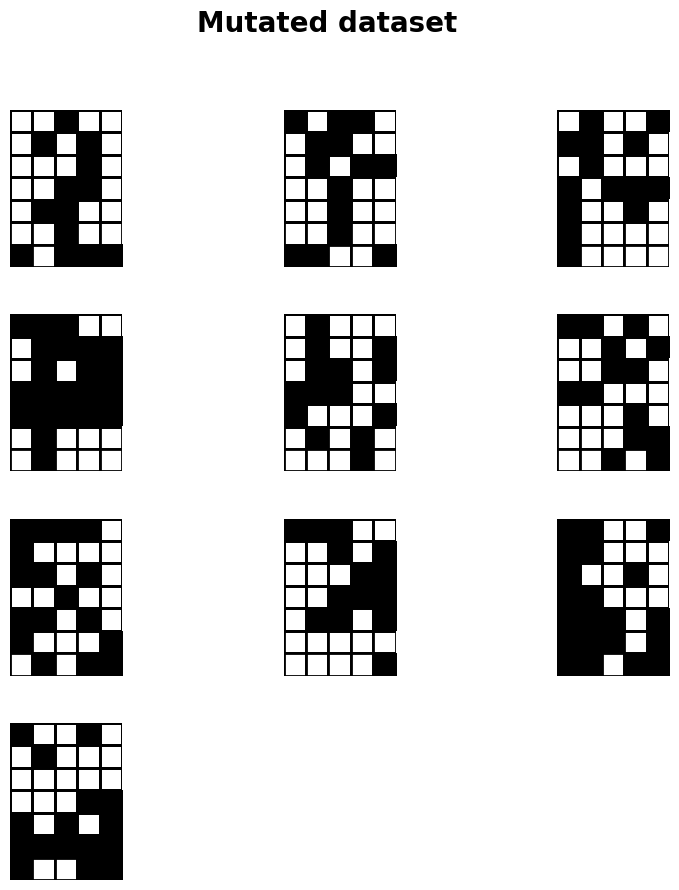

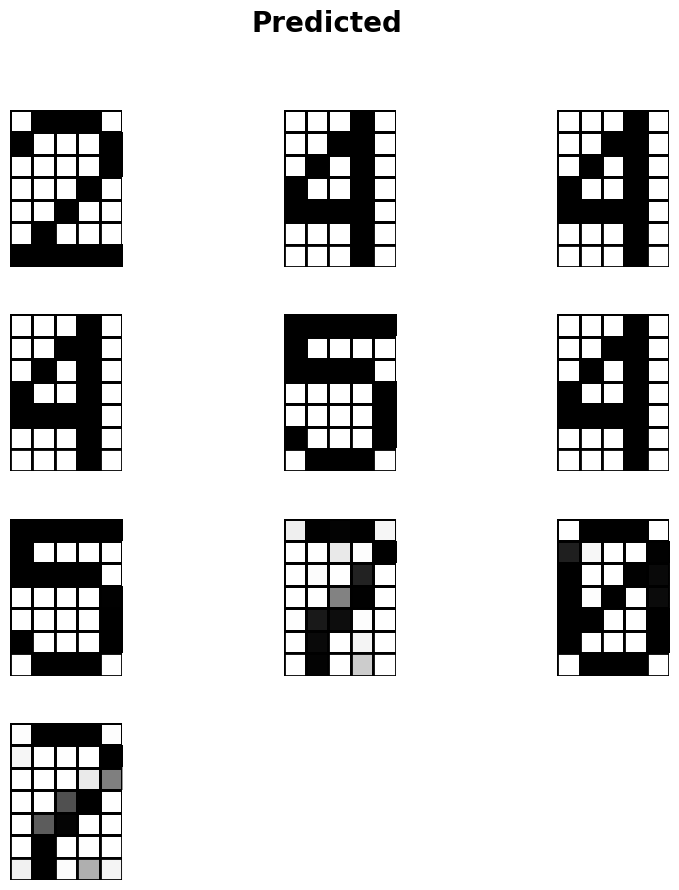

Latent space value:  [0.99967509 0.46506308]  for letter in index  0
Latent space value:  [0.96661002 0.01730736]  for letter in index  1
Latent space value:  [0.90582972 0.00209785]  for letter in index  2
Latent space value:  [0.99292028 0.00304356]  for letter in index  3
Latent space value:  [0.00261432 0.04347604]  for letter in index  4
Latent space value:  [0.99921454 0.07478025]  for letter in index  5
Latent space value:  [0.05877898 0.00441232]  for letter in index  6
Latent space value:  [0.998913   0.19583622]  for letter in index  7
Latent space value:  [0.00424703 0.54565908]  for letter in index  8
Latent space value:  [0.99928188 0.26794074]  for letter in index  9


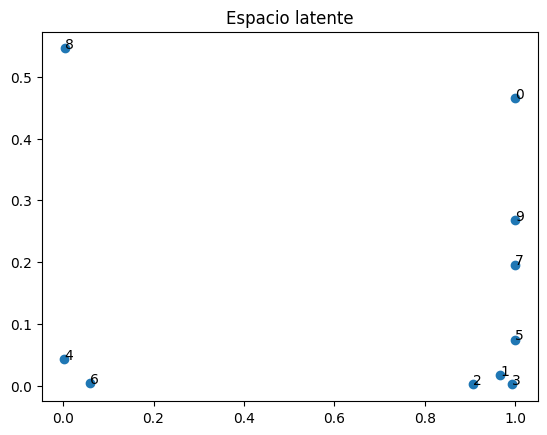

In [2]:
import json
import copy
from src.utils import DataConfig, alter_data
from src.autoencoder import Autoencoder
from src.plots import *
from data.font import _font_num, symbols_num    

def main(): 
    with open('./config_denoising.json', 'r') as f:
        data_config = json.load(f)

    c = DataConfig(data_config, _font_num)
    plot_letters(c.input_data, "Conjunto de entrenamiento")

    autoencoder = Autoencoder(c.input_data, len(c.input_data[0]), c.latent_space_size,
                            c.learning_rate, c.bias, c.epochs, c.training_percentage,
                            c.min_error, c.qty_hidden_layers, c.qty_nodes_in_hidden_layers, 
                            c.output_activation, c.hidden_activation, c.beta,
                            c.optimizer_method, c.alpha, c.beta1, c.beta2,
                            c.epsilon)
    autoencoder.train()

    # Análisis de dataset original
    predicted = []
    for x in c.input_data:
        p = autoencoder.predict(x)
        predicted.append(p)
    plot_letters(predicted, "Predicted")
    
    list = []
    for i in range(len(c.input_data)):
        value = autoencoder.latent_space(c.input_data[i])
        list.append(value)
        print("Latent space value: ", value, " for letter in index ", i)
    plot_latent_space(np.array(list), symbols_num)


    # Análisis de dataset mutado
    for i in [round(0.1*i,2) for i in range(1,6)]:
        print(f"----------------Mutacion={i}----------------")
        original_input = copy.deepcopy(c.input_data)
        alter_data(original_input, i)
        plot_letters(original_input, "Mutated dataset")

        predicted = []
        for x in original_input:
            p = autoencoder.predict(x)
            predicted.append(p)
        plot_letters(predicted, "Predicted")
        
        list = []
        for i in range(len(original_input)):
            value = autoencoder.latent_space(original_input[i])
            list.append(value)
            print("Latent space value: ", value, " for letter in index ", i)
        plot_latent_space(np.array(list), symbols_num)
    


if __name__ == "__main__":
    main()